In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

In [138]:
df = pd.read_csv('data.csv')
df['Насекомое'] = np.where(df['Насекомое'] == 'гусеница', -1, 1)

Text(0, 0.5, 'Длина')

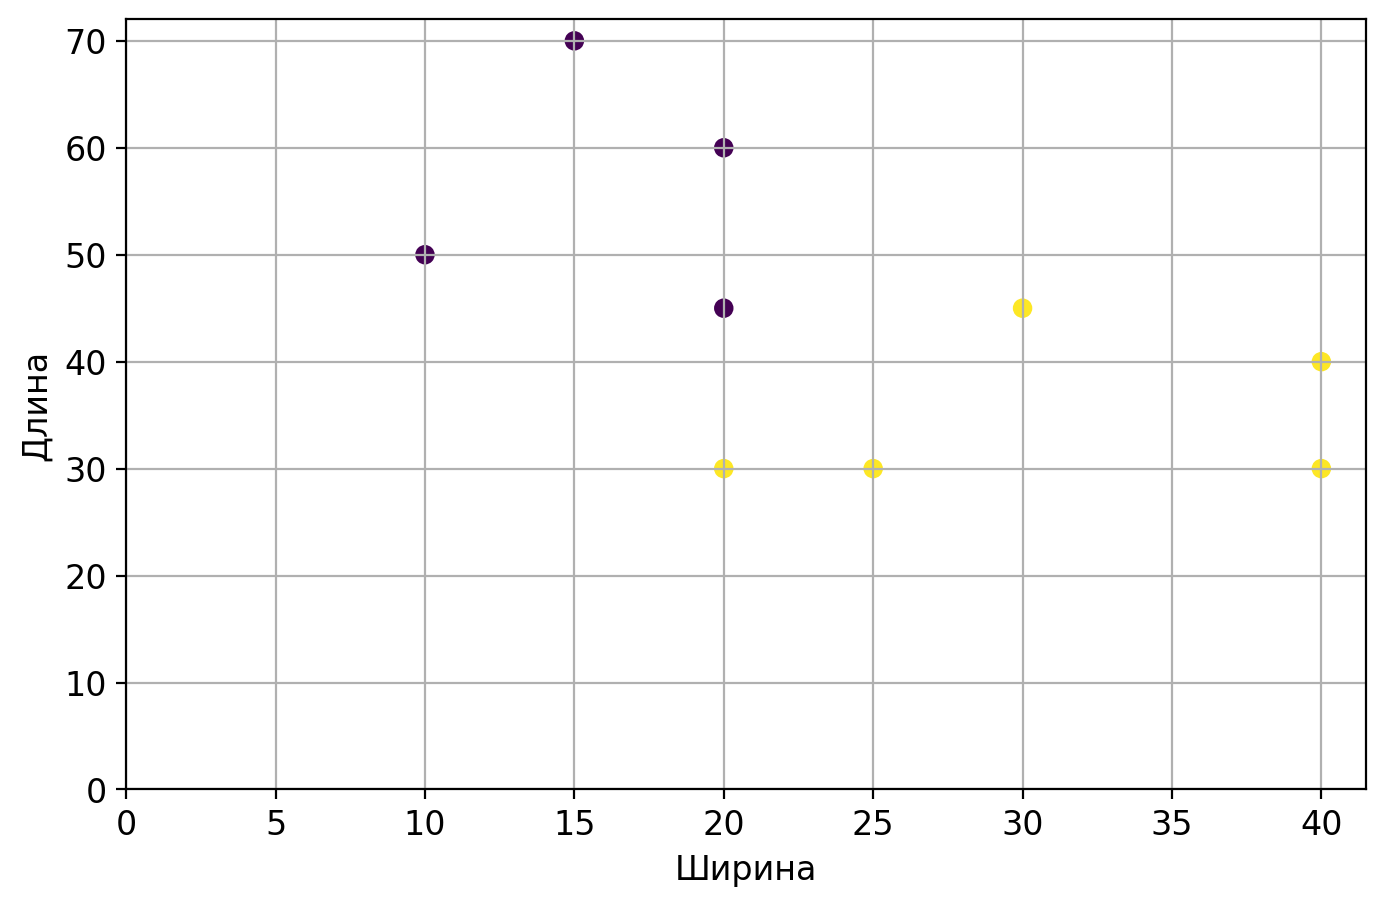

In [139]:
plt.grid(True)
plt.scatter(df["Ширина"], df["Длина"], c=df['Насекомое'])
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Ширина')
plt.ylabel('Длина')

In [140]:
X_train = np.hstack((df['Ширина'].values.reshape(-1, 1), df['Длина'].values.reshape(-1, 1)))
y_train = np.hstack((df['Насекомое'].values))

In [141]:
n_train = len(X_train)                         
w = [0, -1]                                     
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    
N = 50                                          
L = 0.1  
e = 0.1
last_error_index = -1

for n in range(N):
    for i in range(n_train):                
        if y_train[i]*a(X_train[i]) < 0:    
            w[0] = w[0] + L * y_train[i]    
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(X_train[i]) < 0])
    if Q == 0:     
        break       

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]


Text(0, 0.5, 'Длина')

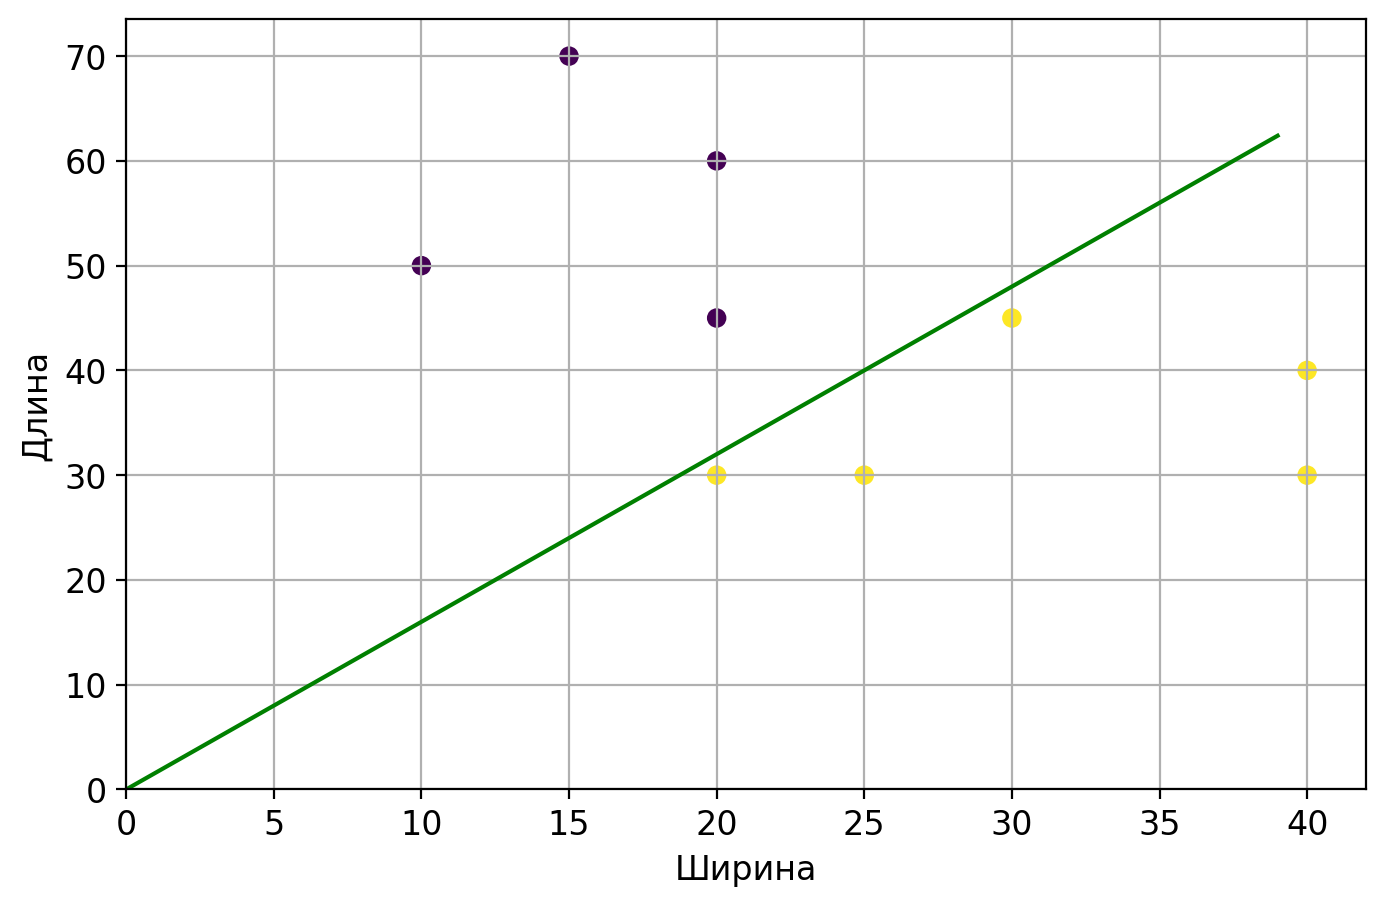

In [142]:
line_x = list(range(max(X_train[:, 0])))    
line_y = [w[0]*x for x in line_x]

plt.grid(True)
plt.scatter(df["Ширина"], df["Длина"], c=df['Насекомое'])
plt.plot(line_x, line_y, color='green')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Ширина')
plt.ylabel('Длина')

In [143]:
ones_column = np.ones((X_train.shape[0], 1), dtype=int)
X2_train = np.hstack((ones_column, X_train))

In [144]:
X2_train

array([[ 1, 10, 50],
       [ 1, 20, 30],
       [ 1, 25, 30],
       [ 1, 20, 60],
       [ 1, 15, 70],
       [ 1, 40, 40],
       [ 1, 30, 45],
       [ 1, 20, 45],
       [ 1, 40, 30]], dtype=int64)

In [145]:
array1 = np.linalg.inv(X2_train.T@X2_train)
array2 = X2_train.T@y_train.T
W = array1@array2

In [146]:
slope = -W[1] / W[2]

print("Угловой коэффициент прямой:", slope)

Угловой коэффициент прямой: 1.061994609164424


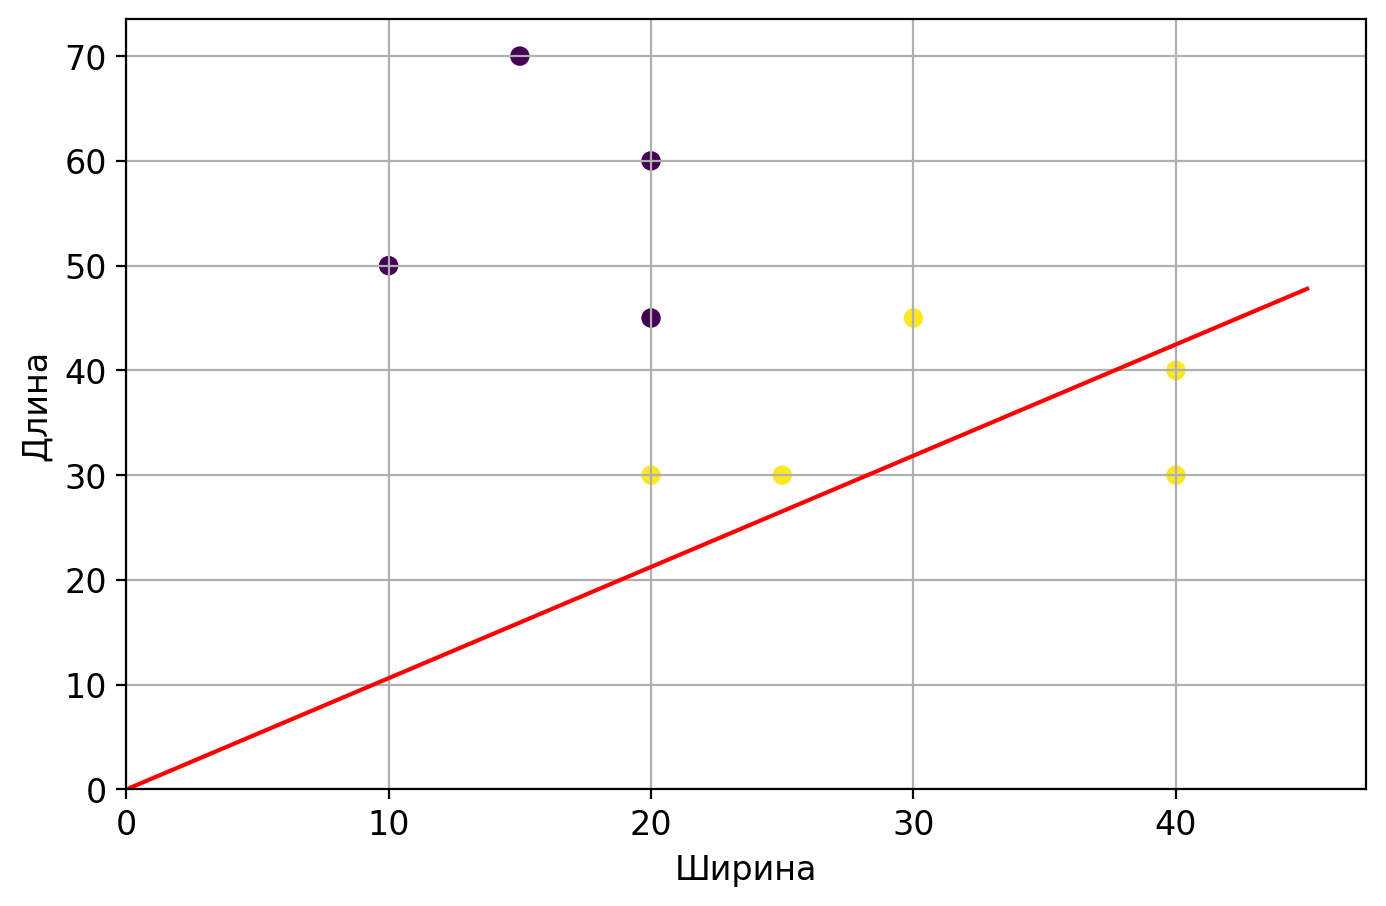

In [147]:
x = np.linspace(0, 45, 100)

# Вычисление соответствующих значений x2
y = slope * x

# Построение графика
plt.plot(x, y, color='red')
plt.scatter(df["Ширина"], df["Длина"], c=df['Насекомое'])
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Ширина')
plt.ylabel('Длина')
plt.grid(True)
plt.show()

Сигмоидная функция потерь

In [148]:
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

Производная сигмоидной функции потерь

In [149]:
def dloss(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [150]:
n_train = len(X2_train)
w3 = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w3, x, y) for x, y in zip(X2_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w3, X2_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w3 = w3 - nt * dloss(w3, X2_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)
    

In [151]:
w3

array([ 0.00524096,  0.32190564, -0.17762702])

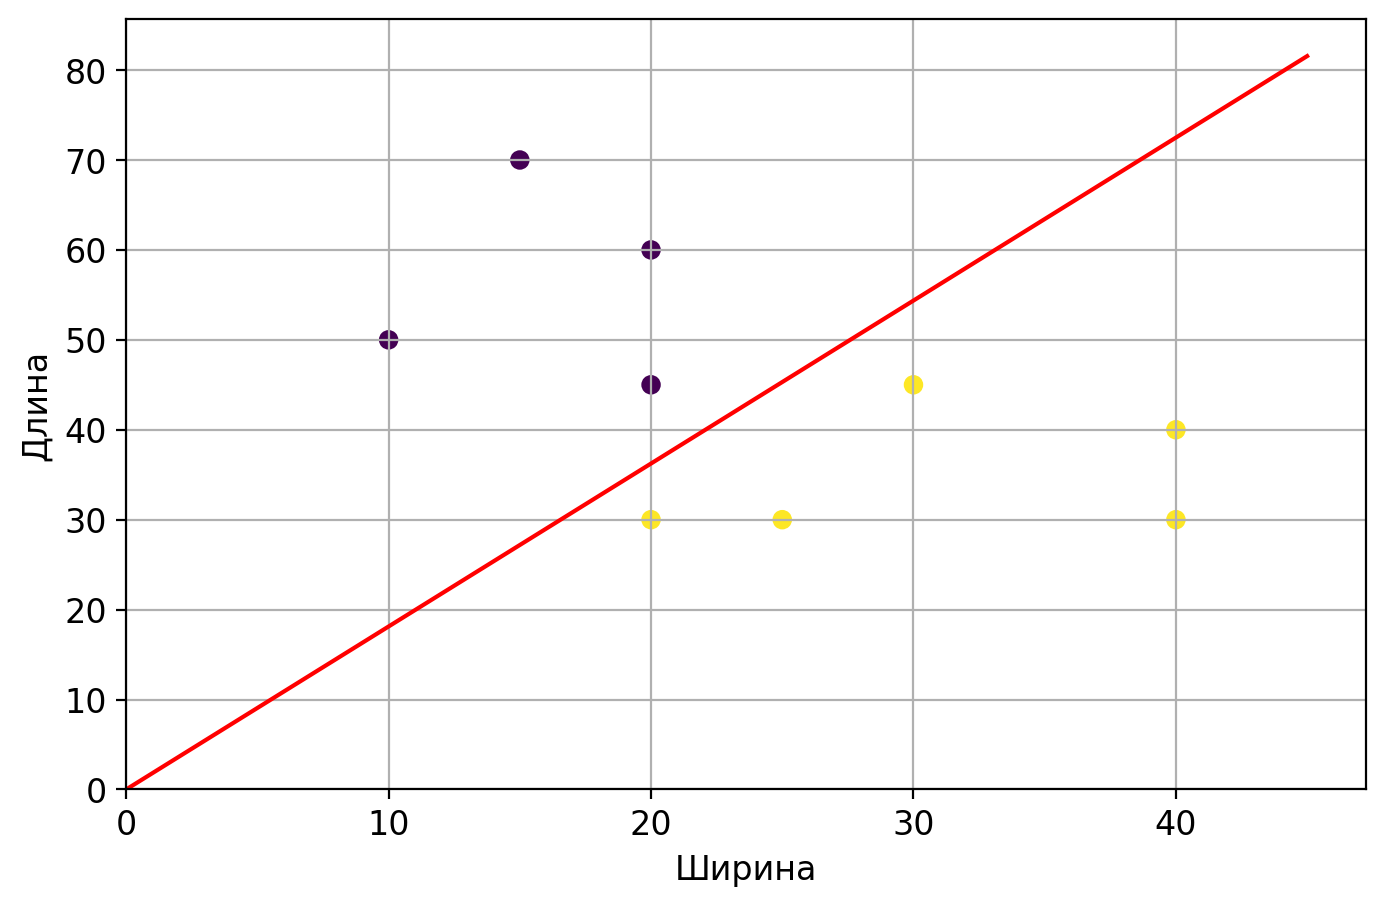

In [152]:
slope3 = -w3[1] / w3[2]
x3 = np.linspace(0, 45, 100)

# Вычисление соответствующих значений x2
y3 = slope3 * x

# Построение графика
plt.plot(x3, y3, color='red')
plt.scatter(df["Ширина"], df["Длина"], c=df['Насекомое'])
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Ширина')
plt.ylabel('Длина')
plt.grid(True)
plt.show()

In [153]:
print(y3)

[ 0.          0.82375275  1.6475055   2.47125826  3.29501101  4.11876376
  4.94251651  5.76626926  6.59002202  7.41377477  8.23752752  9.06128027
  9.88503303 10.70878578 11.53253853 12.35629128 13.18004403 14.00379679
 14.82754954 15.65130229 16.47505504 17.29880779 18.12256055 18.9463133
 19.77006605 20.5938188  21.41757156 22.24132431 23.06507706 23.88882981
 24.71258256 25.53633532 26.36008807 27.18384082 28.00759357 28.83134632
 29.65509908 30.47885183 31.30260458 32.12635733 32.95011009 33.77386284
 34.59761559 35.42136834 36.24512109 37.06887385 37.8926266  38.71637935
 39.5401321  40.36388485 41.18763761 42.01139036 42.83514311 43.65889586
 44.48264862 45.30640137 46.13015412 46.95390687 47.77765962 48.60141238
 49.42516513 50.24891788 51.07267063 51.89642338 52.72017614 53.54392889
 54.36768164 55.19143439 56.01518714 56.8389399  57.66269265 58.4864454
 59.31019815 60.13395091 60.95770366 61.78145641 62.60520916 63.42896191
 64.25271467 65.07646742 65.90022017 66.72397292 67.5